In [122]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import Sequential, utils
from keras.layers import Flatten, Dense
from keras.optimizers import Adam, SGD
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error

In [2]:
trainData = pd.read_csv("sample_data/california_housing_train.csv")
testData = pd.read_csv("sample_data/california_housing_test.csv")

In [3]:
trainData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [4]:
testData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [17]:
trainData["totalRooms"] = pd.qcut(trainData["total_rooms"], 10)

In [18]:
trainData[["totalRooms", "median_house_value"]].groupby(["totalRooms"], as_index=False).mean()

,totalRooms,median_house_value
0,"(1.999, 949.0]",173689.401880
1,"(949.0, 1311.0]",178892.803173
2,"(1311.0, 1589.0]",190888.200236
3,"(1589.0, 1842.0]",196626.877575
4,"(1842.0, 2127.0]",202958.096357
5,"(2127.0, 2460.0]",209298.331176
6,"(2460.0, 2879.0]",222053.228555
7,"(2879.0, 3480.0]",226060.268278
8,"(3480.0, 4677.1]",238025.849323
9,"(4677.1, 37937.0]",234613.410000


In [19]:
trainData.loc[ trainData["total_rooms"] <= 949, "total_rooms"] = 0
trainData.loc[(trainData["total_rooms"] > 949) & (trainData["total_rooms"] <= 1311), "total_rooms"] = 1
trainData.loc[(trainData["total_rooms"] > 1311) & (trainData["total_rooms"] <= 1589), "total_rooms"] = 2
trainData.loc[(trainData["total_rooms"] > 1589) & (trainData["total_rooms"] <= 1842), "total_rooms"] = 3
trainData.loc[(trainData["total_rooms"] > 1842) & (trainData["total_rooms"] <= 2127), "total_rooms"] = 4
trainData.loc[(trainData["total_rooms"] > 2127) & (trainData["total_rooms"] <= 2460), "total_rooms"] = 5
trainData.loc[(trainData["total_rooms"] > 2460) & (trainData["total_rooms"] <= 2879), "total_rooms"] = 6
trainData.loc[(trainData["total_rooms"] > 2879) & (trainData["total_rooms"] <= 3480), "total_rooms"] = 7
trainData.loc[(trainData["total_rooms"] > 3480) & (trainData["total_rooms"] <= 4677.1), "total_rooms"] = 8
trainData.loc[ trainData["total_rooms"] > 4677.1, "total_rooms"] = 9
trainData["total_rooms"] = trainData["total_rooms"].astype(int)

trainData = trainData.drop(["totalRooms"], axis=1)

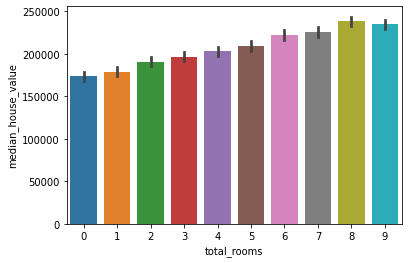

In [20]:
sns.barplot(x="total_rooms", y="median_house_value", data=trainData)

In [21]:
trainData["totalBedrooms"] = pd.qcut(trainData["total_bedrooms"], 5)
trainData[["totalBedrooms", "median_house_value"]].groupby(["totalBedrooms"]).mean()

,median_house_value
totalBedrooms,
"(0.999, 271.0]",199341.636788
"(271.0, 377.0]",204078.957459
"(377.0, 502.0]",206784.995600
"(502.0, 720.0]",206614.700000
"(720.0, 6445.0]",219760.911236


In [22]:
trainData.loc[ trainData["total_bedrooms"] <= 271, "total_bedrooms"] = 0
trainData.loc[(trainData["total_bedrooms"] > 271) & (trainData["total_bedrooms"] <= 377), "total_bedrooms"] = 1
trainData.loc[(trainData["total_bedrooms"] > 377) & (trainData["total_bedrooms"] <= 502), "total_bedrooms"] = 2
trainData.loc[(trainData["total_bedrooms"] > 502) & (trainData["total_bedrooms"] <= 720), "total_bedrooms"] = 3
trainData.loc[ trainData["total_bedrooms"] > 720, "total_bedrooms"] = 4
trainData["total_bedrooms"] = trainData["total_bedrooms"].astype(int)

trainData = trainData.drop(["totalBedrooms"], axis=1)

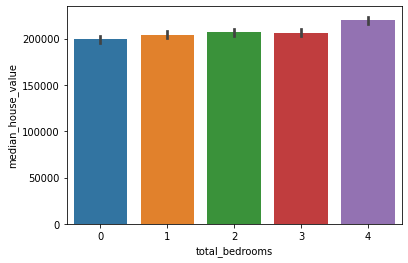

In [23]:
sns.barplot(x="total_bedrooms", y="median_house_value", data=trainData)

In [24]:
trainData["medianAge"] = pd.qcut(trainData["housing_median_age"], 5)
trainData[["medianAge", "median_house_value"]].groupby(["medianAge"], as_index=False).mean()

,medianAge,median_house_value
0,"(0.999, 17.0]",193801.674035
1,"(17.0, 25.0]",203624.472977
2,"(25.0, 33.0]",205089.264870
3,"(33.0, 40.0]",207045.171951
4,"(40.0, 52.0]",230420.302208


In [25]:
trainData.loc[ trainData["housing_median_age"] <= 17, "housing_median_age"] = 0
trainData.loc[(trainData["housing_median_age"] > 17) & (trainData["housing_median_age"] <= 25), "housing_median_age"] = 1
trainData.loc[(trainData["housing_median_age"] > 25) & (trainData["housing_median_age"] <= 33), "housing_median_age"] = 2
trainData.loc[(trainData["housing_median_age"] > 33) & (trainData["housing_median_age"] <= 40), "housing_median_age"] = 3
trainData.loc[ trainData["housing_median_age"] > 40, "housing_median_age"] = 4
trainData["housing_median_age"] = trainData["housing_median_age"].astype(int)

trainData = trainData.drop(["medianAge"], axis=1)

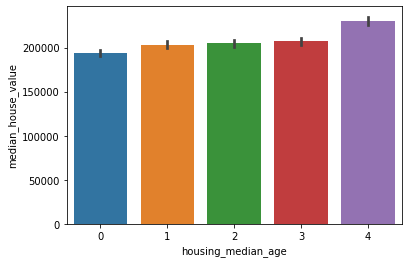

In [26]:
sns.barplot(x="housing_median_age", y="median_house_value", data=trainData)

In [27]:
trainData["populationBand"] = pd.qcut(trainData["population"], 7)
trainData[["populationBand", "median_house_value"]].groupby(["populationBand"], as_index=False).mean()

,populationBand,median_house_value
0,"(2.999, 610.0]",211735.836827
1,"(610.0, 840.0]",216600.272577
2,"(840.0, 1052.0]",211353.508642
3,"(1052.0, 1292.714]",207445.758450
4,"(1292.714, 1614.0]",203315.339638
5,"(1614.0, 2203.571]",199667.983093
6,"(2203.571, 35682.0]",200986.561136


In [28]:
trainData.loc[ trainData["population"] <= 610, "population"] = 0
trainData.loc[(trainData["population"] > 610) & (trainData["population"] <= 840), "population"] = 1
trainData.loc[(trainData["population"] > 840) & (trainData["population"] <= 1052), "population"] = 2
trainData.loc[(trainData["population"] > 1052) & (trainData["population"] <= 1292.714), "population"] = 3
trainData.loc[(trainData["population"] > 1292.714) & (trainData["population"] <= 1614), "population"] = 4
trainData.loc[(trainData["population"] > 1614) & (trainData["population"] <= 2203.571), "population"] = 5
trainData.loc[ trainData["population"] > 2203.571, "population"] = 6
trainData["population"] = trainData["population"].astype(int)

trainData = trainData.drop(["populationBand"], axis=1)

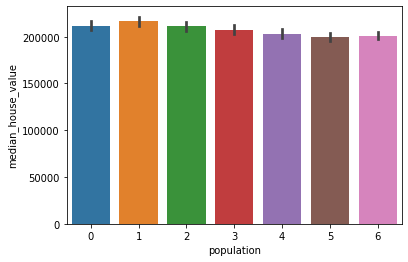

In [29]:
sns.barplot(x="population", y="median_house_value", data=trainData)

In [30]:
trainData["householdsBand"] = pd.qcut(trainData["households"], 5)
trainData[["householdsBand", "median_house_value"]].groupby(["householdsBand"], as_index=False).mean()

,householdsBand,median_house_value
0,"(0.999, 255.0]",195774.914520
1,"(255.0, 355.0]",202443.998524
2,"(355.0, 471.0]",207452.910079
3,"(471.0, 667.0]",210091.291311
4,"(667.0, 6082.0]",220790.449676


In [31]:
trainData.loc[ trainData["households"] <= 255, "households"] = 0
trainData.loc[(trainData["households"] > 255) & (trainData["households"] <= 355), "households"] = 1
trainData.loc[(trainData["households"] > 355) & (trainData["households"] <= 471), "households"] = 2
trainData.loc[(trainData["households"] > 471) & (trainData["households"] <= 667), "households"] = 3
trainData.loc[ trainData["households"] > 667, "households"] = 4
trainData["households"] = trainData["households"].astype(int)

trainData = trainData.drop(["householdsBand"], axis=1)

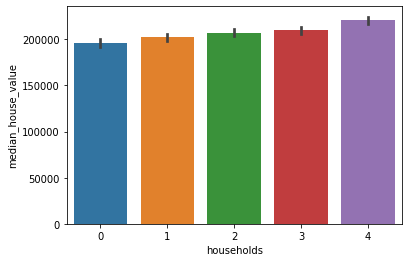

In [32]:
sns.barplot(x="households", y="median_house_value", data=trainData)

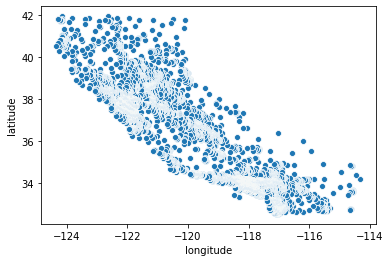

In [33]:
sns.scatterplot(x="longitude", y="latitude", data=trainData)

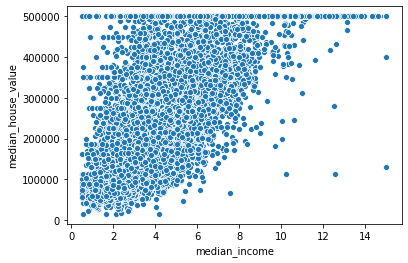

In [126]:
sns.scatterplot(x="median_income", y="median_house_value", data=trainData)

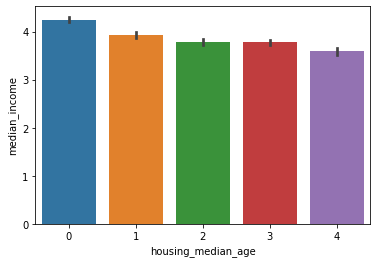

In [137]:
sns.barplot(x="housing_median_age", y="median_income", data=trainData)

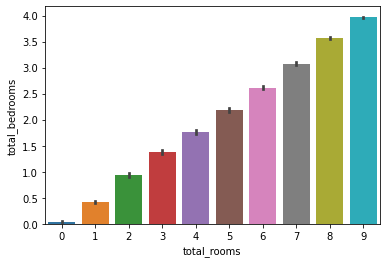

In [128]:
sns.barplot(x="total_rooms", y="total_bedrooms", data=trainData)

In [34]:
x_train = trainData.drop("median_house_value", axis=1)
y_train = trainData["median_house_value"]
x_test = testData.drop("median_house_value", axis=1)
y_test = testData["median_house_value"]

In [35]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [36]:
x_train_norm = (x_train - x_train.mean()) / x_train.std()
y_train_norm = (y_train - y_train.mean()) / y_train.std()
x_test_norm = (x_test - x_test.mean()) / x_test.std()
y_test_norm = (y_test - y_test.mean()) / y_test.std()

In [49]:
y_train_norm

array([-1.21055773, -1.09674535, -1.04846131, ..., -0.89412482,
       -1.04759909, -0.97172417])

In [109]:
def trainModel():
  md = Sequential()
  md.add(Dense(1, input_shape=(x_train_norm.shape[1],)))
  md.compile(loss="mean_squared_error", 
             optimizer=SGD(lr=0.1),
             metrics=["mean_squared_error"])
  return md

In [112]:
model = trainModel()
model.fit(x_train_norm, y_train_norm, validation_split=0.3, epochs=50, verbose=2)

Train on 11900 samples, validate on 5100 samples
Epoch 1/50
 - 0s - loss: 1.0448 - mean_squared_error: 1.0448 - val_loss: 0.9818 - val_mean_squared_error: 0.9818
Epoch 2/50
 - 0s - loss: 0.8599 - mean_squared_error: 0.8599 - val_loss: 1.5705 - val_mean_squared_error: 1.5705
Epoch 3/50
 - 0s - loss: 0.8102 - mean_squared_error: 0.8102 - val_loss: 1.0404 - val_mean_squared_error: 1.0404
Epoch 4/50
 - 0s - loss: 0.7673 - mean_squared_error: 0.7673 - val_loss: 0.7609 - val_mean_squared_error: 0.7609
Epoch 5/50
 - 0s - loss: 0.7124 - mean_squared_error: 0.7124 - val_loss: 0.7538 - val_mean_squared_error: 0.7538
Epoch 6/50
 - 0s - loss: 0.6589 - mean_squared_error: 0.6589 - val_loss: 0.8984 - val_mean_squared_error: 0.8984
Epoch 7/50
 - 0s - loss: 0.6092 - mean_squared_error: 0.6092 - val_loss: 0.5689 - val_mean_squared_error: 0.5689
Epoch 8/50
 - 0s - loss: 0.5923 - mean_squared_error: 0.5923 - val_loss: 1.3287 - val_mean_squared_error: 1.3287
Epoch 9/50
 - 0s - loss: 0.5855 - mean_squared_

In [117]:
linearReg = LinearRegression()
linearReg.fit(x_train_norm, y_train_norm)
predictions = linearReg.predict(x_test_norm)
accuracy = round(linearReg.score(x_train_norm, y_train_norm) * 100, 2)
accuracy

64.73